
Imports e definição do dataset.

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

Carregamento do dataset cifar-10

In [4]:
# Carregar o conjunto de dados CIFAR-10
cifar10 = keras.datasets.cifar10
#Carrega duas tuplas, representando os dados de treinamento e de teste.
#Cada tupla tem as imagens e os respectivos rótulos
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
num_classes = 10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


O código abaixo mostra as 10 primeiras imagens de treino e teste do cifar-10

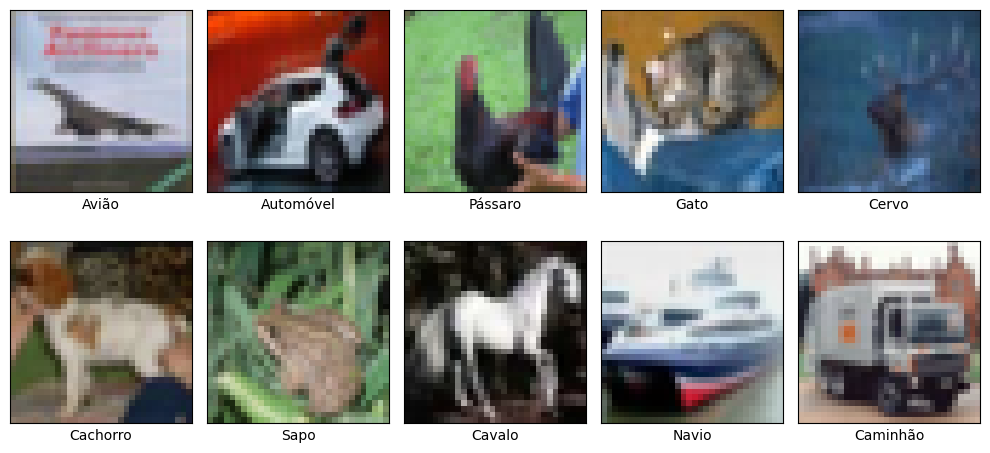

In [5]:
# Defina as classes do CIFAR-10
class_names = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',
               'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

# Crie um dicionário para mapear as classes para as imagens correspondentes
class_to_image = {}
for i in range(10):
    index = (test_labels == i).nonzero()[0][0]  # Encontre o primeiro índice da classe
    class_to_image[i] = test_images[index]

# Mostre uma imagem de cada classe
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])  # Remova os rótulos do eixo x
    plt.yticks([])  # Remova os rótulos do eixo y
    plt.imshow(class_to_image[i])
    plt.xlabel(class_names[i])

plt.tight_layout()
plt.show()

Abaixo, convertemos os rótulos escalares (números de 0 a 9) para one-hot encoding.

Não é necessário realizar este passo, caso seja utilizada a função de custo esparse_categorical_cross_entropy

In [6]:
# Converter para codificação one-hot dos labels
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=num_classes)
#Não é necessário se utilizar como função de custo esparse_categorical_cross_entropy

Função que retorna uma rede neural para o cifar-10

In [7]:
# Crie o modelo de rede neural convolucional simples
def get_cifar10_network():
    model = keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),#(32, 32, 3) porque as imagens são 32X32 e RGB, portanto, tendo 3 canais de cor
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')  # 10 classes de saída
    ])

    # Compile o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',#pode ser substituída pela esparse_categorical_cross_entropy
                  metrics=['accuracy'])

    model.summary()

    return model

Trecho para treinar e avaliar a rede neural.
O treino é realizado com os dados de treino e a avaliação do modelo é realizada nos dados de teste.

In [8]:
# Treine o modelo
model = get_cifar10_network()
model.fit(train_images, train_labels, epochs=10)

# Avalie o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%')

c:\Users\lufi9\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1453 - loss: 8.0398
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2350 - loss: 2.0193
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3088 - loss: 1.7866
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3518 - loss: 1.6626
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4478 - loss: 1.4857
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5209 - loss: 1.3239
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5593 - loss: 1.2222
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5851 - loss: 1.1528
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6027 - loss: 1.1217
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6104 - loss: 1.0855
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5318 - loss: 1.3731
Acurácia no conjunto de teste: 52.94%


Na célula abaixo, adicione o código para carregar os demais datasets

In [16]:
#Inclua o código para carregar os demais datasets
mnist = keras.datasets.mnist
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

n = 10 # numero de classes

y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, num_classes=n)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, num_classes=n)


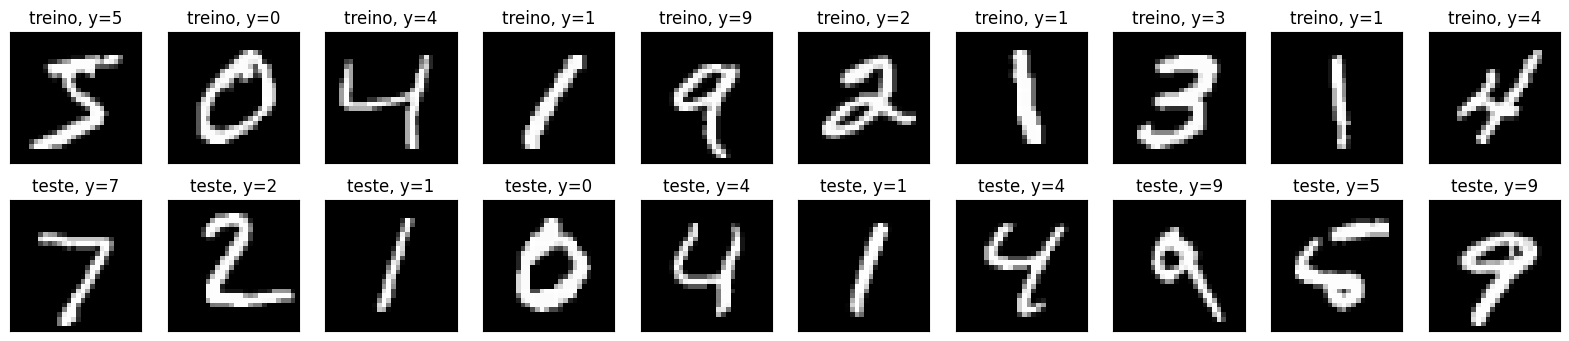

In [19]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # treino
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"treino, y={y_train[i]}")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # teste
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test[i])
    plt.title(f"teste, y={y_test[i]}")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Tarefa
Escreva código para executar redes neurais nos seguintes datasets:

MNIST (pode aproveitar o codigo existente)
Fashion MNIST
CIFAR-10
CIFAR-100
Cada execução deve ser por 10 épocas.

Você deve preencher as funções a seguir para retornarem a rede neural com a melhor configuração que você conseguiu para cada dataset. O notebook deve ser entregue com a rede neural que obteve a melhor performance em cada conjunto de dados.

IMPORTANTE: as funções não devem TREINAR nem AVALIAR as redes neurais, apenas instanciá-las e retorná-las.

Ao final, preencha o dict results com o desempenho encontrado em cada execução.

In [23]:
def get_fashion_mnist_network():
  pass

def get_mnist_network():
  network = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),       
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(n, activation='softmax') 
  ])

  network.compile(optimizer = 'adam',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
  network.summary()

  return network

def get_cifar100_network():
  pass # substitua pelo seu codigo

#Você pode aproveitar as ideias do exemplo acima
def get_cifar10_network():
  pass # substitua pelo seu codigo

In [24]:
# testes
mnist_network = get_mnist_network()
mnist_network.fit(x_train_mnist, y_train_mnist, epochs = 5)
loss, accuracy = mnist_network.evaluate(x_test_mnist, y_test_mnist)        

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 80)             │        62,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,610 (248.48 KB)

 Trainable params: 63,610 (248.48 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.7548 - loss: 6.7962
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.8904 - loss: 0.4496
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.9207 - loss: 0.3115
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 876us/step - accuracy: 0.9297 - loss: 0.2686
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step - accuracy: 0.9362 - loss: 0.2497
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9222 - loss: 0.3215


Preencha o dict abaixo substituindo os None com a acuracia final (acc) e o tempo de treinamento (time) encontrado no seu experimento pra cada dataset

In [ ]:
results = {
    "mnist": {"time": None, "acc": None},
    "fashion_mnist": {"time": None, "acc": None},
    "cifar10": {"time": None, "acc": None},
    "cifar100": {"time": None, "acc": None},
}